In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

In [4]:
dfFromJson = pd.read_csv(r"C:\Users\rouma\Documents\BlueRock\Projekt\gpsData\gpsData\A9216\gpsSeriesA9216.csv")
dfFromJson

,alt,batPct,gpsAt,heading,lat,lon,speed
0,-21,100,2021-08-23T14:27:55Z,82,45.4650,-73.7247,0
1,21,100,2021-08-23T14:27:42Z,176,45.4648,-73.7248,12
2,-4,100,2021-08-23T14:26:57Z,278,45.4651,-73.7255,0
3,3,100,2021-08-23T14:26:15Z,316,45.4645,-73.7248,8
4,3,100,2021-08-23T14:25:57Z,314,45.4638,-73.7239,20
...,...,...,...,...,...,...,...
14846,-25,94,2021-06-25T22:47:55Z,328,45.4832,-73.7196,0
14847,58,93,2021-06-25T22:44:08Z,76,45.4833,-73.7201,2
14848,58,95,2021-06-25T20:53:57Z,76,45.4833,-73.7201,2
14849,58,95,2021-06-25T20:53:47Z,76,45.4833,-73.7201,2


## Convert to Geojson file

In [4]:
from geojson import LineString, dump, Feature, FeatureCollection
#Tuple list of coordinates
tuplelistFromJson = []
dfJson_Small['latlongTuple'] = list(zip(dfJson_Small.lon, dfJson_Small.lat))
for i in dfJson_Small['latlongTuple']:
    tuplelistFromJson.append(i)
#### Convert to a GeoJson file ####
lineFromJson = LineString(tuplelistFromJson)

featuresFromJson = []
featuresFromJson.append(Feature(geometry=lineFromJson, properties={"country": "Canada"}))
    
feature_collectionFromJson = FeatureCollection(featuresFromJson)
    
# with open(r'C:\Users\rouma\Documents\BlueRock\Projekt\gpsData\gpsData\A9216\routeSegment.geojson', 'w') as f:
#     dump(feature_collectionFromJson, f)

NameError: name 'dfJson_Small' is not defined

## Specify time span

In [5]:
from datetime import datetime
startDate = '2021-07-23' #'2021-06-30'
endDate = '2021-07-24' # '2021-07-01'

#startDt = datetime.strptime(startDate, '%Y-%M-%d')
startDt = datetime.fromisoformat(startDate)
endDt = datetime.fromisoformat(endDate)

In [6]:
pd.options.plotting.backend = 'matplotlib'

In [7]:
dateList = []
for d in dfFromJson['gpsAt']:
    dateList.append(pd.to_datetime(d))
dfFromJson['Date'] = dateList

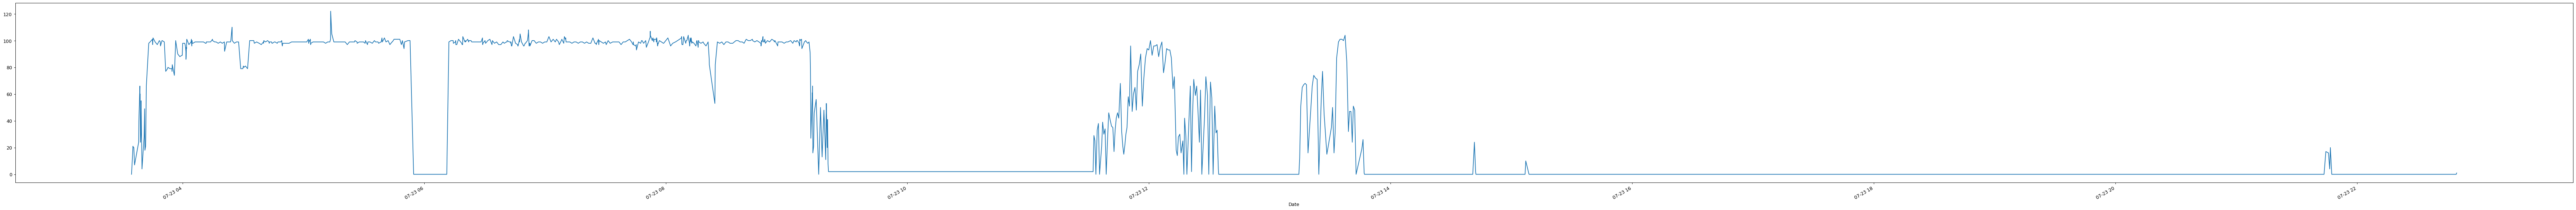

In [8]:
dfJson_Small = dfFromJson[(dfFromJson['Date'] >= startDate) & (dfFromJson['Date'] < endDate)]
dfJson_Small = dfJson_Small.iloc[::-1] #Turn df upside down
plt.figure(figsize=(100, 8), dpi=90)



dfJson_Small.set_index('Date', inplace=True)
ax = dfJson_Small['speed'].plot()

ticklabels = dfJson_Small.index.strftime('%H:%M:%S')
ax.xaxis.set_label(ticklabels)

#plt.rcParams["date.autoformatter.minute"] = "%Y-%m-%d %H:%M:%S"
#ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.show()

## Calculate distance, avg. speed and compare to given speed.

In [9]:
from math import cos, asin, sqrt, pi
from datetime import datetime

def distanceInKm(lat1, lon1, lat2, lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a))

def distanceInKm1(latDiff, lonDiff, lat1, lat2):
    p = pi/180
    a =  0.5 - cos((latDiff)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lonDiff)*p))/2
    return 12742*asin(sqrt(a))

def timeInSecs(t1, t2):
    try:
        time1 = datetime.strptime(t1,'%Y-%m-%dT%H:%M:%S%z')
        time2 = datetime.strptime(t2,'%Y-%m-%dT%H:%M:%S%z')
        secDifference = (time2-time1).total_seconds()
    except: 
        
        return 0
    return secDifference



distances = [distanceInKm(lat1, lat2, lon1, lon2) for lat1, lat2, lon1, lon2 in zip(dfJson_Small['lat'], dfJson_Small['lon'], dfJson_Small['lat'].shift(1),  dfJson_Small['lon'].shift(1))]
time = [timeInSecs(t1, t2) for t1, t2 in zip(dfJson_Small['gpsAt'].shift(1), dfJson_Small['gpsAt'])]
time
timeInHour = [x / (60*60) for x in time]


avgSpeed = []
for i in range(len(time)):
    try:
        avgSpeed.append(distances[i] / timeInHour[i])
    except:
        avgSpeed.append(np.nan)
dfJson_Small['avgSpeed'] = avgSpeed
dfJson_Small


,alt,batPct,gpsAt,heading,lat,lon,speed,avgSpeed
Date,,,,,,,,
2021-07-23 03:34:40+00:00,-3,100,2021-07-23T03:34:40Z,206,45.4824,-73.7197,0,NaN
2021-07-23 03:35:10+00:00,21,100,2021-07-23T03:35:10Z,44,45.4829,-73.7176,14,20.748234
2021-07-23 03:35:22+00:00,50,100,2021-07-23T03:35:22Z,312,45.4833,-73.7180,21,16.296257
2021-07-23 03:35:40+00:00,37,100,2021-07-23T03:35:40Z,284,45.4840,-73.7193,20,25.557764
2021-07-23 03:35:49+00:00,26,100,2021-07-23T03:35:49Z,206,45.4838,-73.7197,20,15.320629
...,...,...,...,...,...,...,...,...
2021-07-23 21:47:18+00:00,147,93,2021-07-23T21:47:18Z,260,43.7055,-79.5819,5,5.492238
2021-07-23 21:47:28+00:00,173,93,2021-07-23T21:47:28Z,16,43.7057,-79.5820,0,8.512973
2021-07-23 22:48:58+00:00,173,89,2021-07-23T22:48:58Z,16,43.7057,-79.5820,0,0.000000


In [10]:
import matplotlib.pyplot as plt
df = dfJson_Small
df = df.reset_index()
date = df['Date'][0]
date.to_pydatetime()
df['Date'] = df['Date'].dt.tz_localize(None)
dates = [d.to_pydatetime() for d in df['Date']]

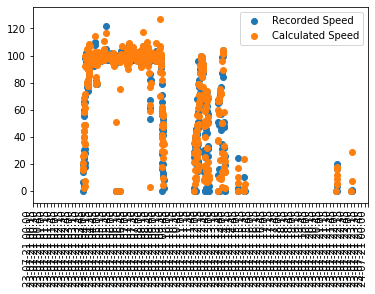

,Date,alt,batPct,gpsAt,heading,lat,lon,speed,avgSpeed
0,2021-07-23 03:34:40,-3,100,2021-07-23T03:34:40Z,206,45.4824,-73.7197,0,NaN
1,2021-07-23 03:35:10,21,100,2021-07-23T03:35:10Z,44,45.4829,-73.7176,14,20.748234
2,2021-07-23 03:35:22,50,100,2021-07-23T03:35:22Z,312,45.4833,-73.7180,21,16.296257
3,2021-07-23 03:35:40,37,100,2021-07-23T03:35:40Z,284,45.4840,-73.7193,20,25.557764
4,2021-07-23 03:35:49,26,100,2021-07-23T03:35:49Z,206,45.4838,-73.7197,20,15.320629
...,...,...,...,...,...,...,...,...,...
685,2021-07-23 21:47:18,147,93,2021-07-23T21:47:18Z,260,43.7055,-79.5819,5,5.492238
686,2021-07-23 21:47:28,173,93,2021-07-23T21:47:28Z,16,43.7057,-79.5820,0,8.512973
687,2021-07-23 22:48:58,173,89,2021-07-23T22:48:58Z,16,43.7057,-79.5820,0,0.000000
688,2021-07-23 22:49:18,145,89,2021-07-23T22:49:18Z,124,43.7046,-79.5833,0,28.957483


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates


from matplotlib.pyplot import figure


fig, ax = plt.subplots(1)
fig.autofmt_xdate()

plt.xticks(rotation=90)
plt.scatter(dates, df['speed'], label = 'Recorded Speed')
plt.scatter(dates, df['avgSpeed'], label = 'Calculated Speed')

xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=15))
#ax.xaxis.set_major_locator(mdates.HourLocator(interval=3))
ax.xaxis.set_major_formatter(xfmt)
plt.rcParams["figure.figsize"] = (50,3)

plt.legend(loc="upper right")
#plt.xlim(datetime(2021,7,12,18,0,0), datetime(2021,7,13,4,0,0) )
plt.xlim(startDt, endDt)
plt.show()
df

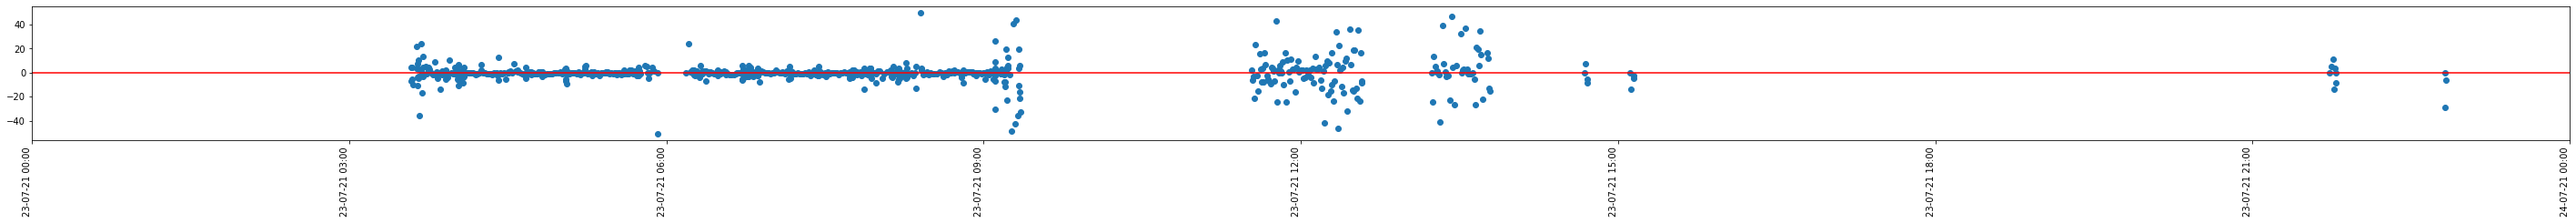

In [12]:
## Measurement errors ##
# Calculate the difference between the recorded and the calculated speed
df['speedDiff'] = df['speed'] - df['avgSpeed']

#SpeedDiff negative: Calculated speed higher than recorded speed: Did drive faster than recorded.

fig, ax = plt.subplots(1)
fig.autofmt_xdate()

plt.xticks(rotation=90)
plt.scatter(dates, df['speedDiff'])
plt.axhline(y=0, color ='r', linestyle='-')

xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.rcParams["figure.figsize"] = (50,5)
#figure(figsize=(8, 6), dpi=80)
plt.xlim(startDt, endDt )
plt.show()

## Perform clustering

In [13]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

#secDiff = [(t2 - t1).total_seconds() for t1, t2 in zip(df['Date'].shift(1), df['Date'])]
minDiff = [(t2 - df['Date'][0]).total_seconds() / 60 for t2 in df['Date']]
df['minDiff'] = minDiff

np_array = df[["minDiff", "avgSpeed"]].to_numpy()
np_array = StandardScaler().fit_transform(np_array)


C:\Users\rouma\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\rouma\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=Tru

In [14]:
def plot_cluster(X, y, title="Cluster plot"):
    fig = X.plot.scatter(x='minDiff', y='avgSpeed', color=y)
    fig.update_layout(autosize=False, width=1500, height=500,
                  coloraxis = dict(showscale=False, colorscale='Portland'),
                  font=dict(size=18),
                  title=dict(text=title, x=0.5, y=0.95, xanchor='center'))
    fig.update_traces(marker=dict(size=10))
    return fig


In [15]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"

pd.options.plotting.backend = 'plotly'
clustering = DBSCAN(eps=0.1, min_samples=5).fit(np_array[1:])
pred = clustering.labels_

fig = plot_cluster(df[1:], pred, title="Continuous Only")
fig


In [16]:
minDiff = [(t2 - df['Date'][0]).total_seconds() / 60 for t2 in df['Date']]
df['minDiff'] = minDiff

#dfSubset = df[["minDiff", "avgSpeed"]][(df['minDiff'] > 477) & (df['minDiff'] < 700)]
dfSubset = df[["minDiff", "avgSpeed"]][(df['minDiff'] < 360)]
np_array = dfSubset.to_numpy()


#np_array = df[["minDiff", "speed"]].to_numpy()


np_array = StandardScaler().fit_transform(np_array)

pd.options.plotting.backend = 'plotly'
clustering1 = DBSCAN(eps=0.2, min_samples=4).fit(np_array[1:])
pred1 = clustering1.labels_

#fig = plot_cluster(df[1:], pred1, title="Continuous Only")
fig = plot_cluster(dfSubset[1:], pred1, title="Continuous Only")
fig

In [17]:
len(set(clustering1.labels_))

7

# Local Outlier Factor

In [18]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

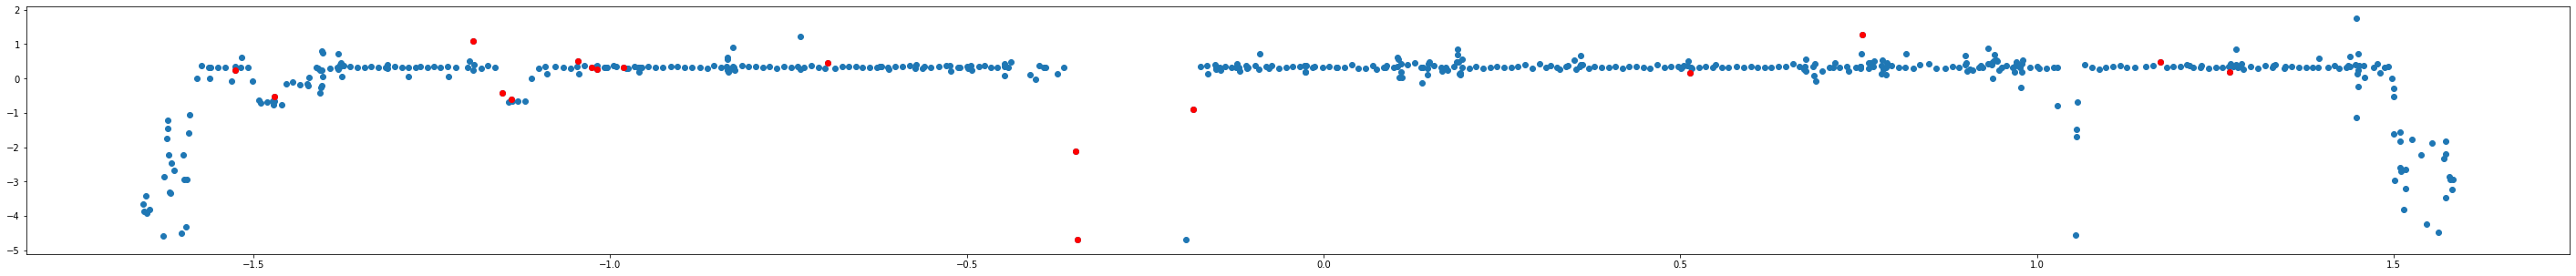

In [19]:
# plt.scatter(np_array[:,0], np_array[:,1] )

lof = LocalOutlierFactor(n_neighbors=2  , contamination=0.03)


y_pred = lof.fit_predict(np_array[1:,])
lofs_index = where(y_pred==-1)
values = np_array[1:,][lofs_index]

plt.scatter(np_array[1:,0], np_array[1:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()


C:\Users\rouma\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning:

default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.



-1.2190632524596383


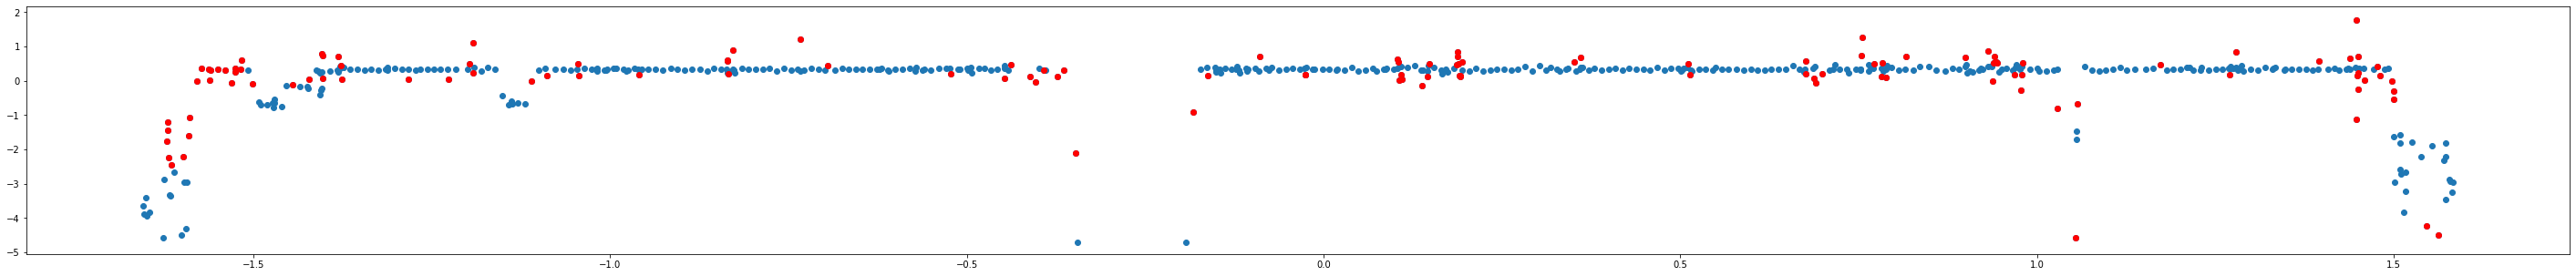

In [20]:
model = LocalOutlierFactor(n_neighbors=20) 
model.fit_predict(np_array[1:])
lof = model.negative_outlier_factor_ 

thresh = quantile(lof, .23)
print(thresh)

index = where(lof<=thresh)
values = np_array[1:][index]

plt.scatter(np_array[1:,0], np_array[1:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()